In [6]:
import os
os.chdir('/home/wisc/maheswararao/code/stain2stain/stain2stain')

import pandas as pd
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_dir = '/data1/shared/data/destain_restain/he_lhe/'
csv_file_name = 'dataset_he-lhe_512x512_metadata2.csv'

df = pd.read_csv(os.path.join(data_dir, csv_file_name))
df.head()

,image_id,tile_id,label,label_name,stain,microns_per_pixel,split,icc_applied,he_filepath,target_filepath,amyloid_filepath,lfb_filepath,map2_filepath,graywhite_filepath
0,4a3005c6_part-A10_HE_1030379_level2_0-25,0_0,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_h...,4a3005c6_part-A10_LHE_1030429_level2_0-25_0_0_...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_l...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_m...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_g...
1,4a3005c6_part-A10_HE_1030379_level2_0-25,0_512,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...,4a3005c6_part-A10_LHE_1030429_level2_0-25_0_51...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...
2,4a3005c6_part-A10_HE_1030379_level2_0-25,512_0,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...,4a3005c6_part-A10_LHE_1030429_level2_0-25_512_...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...
3,4a3005c6_part-A10_HE_1030379_level2_0-25,512_512,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...,4a3005c6_part-A10_LHE_1030429_level2_0-25_512_...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...
4,801a1d73_part-A10_HE_1030376_level2_0-25,0_0,0,graywhite,LHE,32.517382,train,False,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_h...,801a1d73_part-A10_LHE_1030426_level2_0-25_0_0_...,NaN,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_l...,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_m...,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_g...


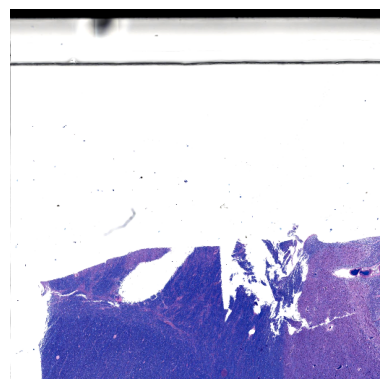

In [20]:
row = df.iloc[0]
img_path = os.path.join(data_dir, row['split'], row['target_filepath'])
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

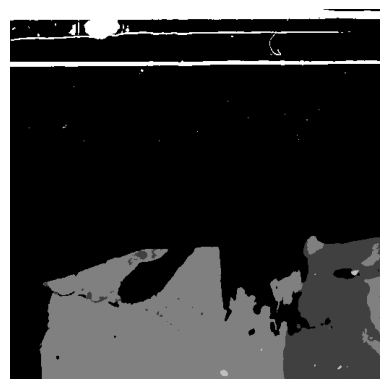

In [14]:
row = df.iloc[0]
img_path = os.path.join(data_dir, row['split'], row['graywhite_filepath'])
gray_white_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_white_image, cmap='gray')
plt.axis('off')
plt.show()
# image = Image.open(img_path)
# gray_white_image = np.array(gray_image)
# cv2.imshow('Gray White Image', gray_white_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# img_path

In [15]:
# gray_white_image = cv2.imread(img_path)
gray_white_image.shape
# image.size

(512, 512)

In [17]:
np.unique(gray_white_image)

array([0, 1, 2, 3, 4], dtype=uint8)

In [6]:
# os.path.exists(img_path)
cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).shape

(512, 512)

In [14]:
data_path = '/data1/shared/data/destain_restain/he_amyloid/positive_crops/flow_matching/'
df = pd.read_csv(os.path.join(data_path, 'dataset_nirschl_et_al_2026_metadata.csv'))

df.head()

,image_id,label,label_name,stain,microns_per_pixel,split,icc_applied,he_filepath,ihc_filepath,amyloid_filepath,lfb_filepath,map2_filepath,graywhite_filepath
0,00000_135040e981d9c0ed_part-A3-4_amyloid_x1000...,0,amyloid,IHC(HDab),0.25,train,False,00000_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00000_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00000_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00000_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00000_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00000_135040e981d9c0ed_part-A3-4_amyloid_x1000...
1,01628_135040e981d9c0ed_part-A3-4_amyloid_x1000...,0,amyloid,IHC(HDab),0.25,train,True,01628_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01628_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01628_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01628_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01628_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01628_135040e981d9c0ed_part-A3-4_amyloid_x1000...
2,00001_135040e981d9c0ed_part-A3-4_amyloid_x1000...,0,amyloid,IHC(HDab),0.25,train,False,00001_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00001_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00001_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00001_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00001_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00001_135040e981d9c0ed_part-A3-4_amyloid_x1000...
3,01629_135040e981d9c0ed_part-A3-4_amyloid_x1000...,0,amyloid,IHC(HDab),0.25,train,True,01629_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01629_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01629_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01629_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01629_135040e981d9c0ed_part-A3-4_amyloid_x1000...,01629_135040e981d9c0ed_part-A3-4_amyloid_x1000...
4,00002_135040e981d9c0ed_part-A3-4_amyloid_x1000...,0,amyloid,IHC(HDab),0.25,train,False,00002_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00002_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00002_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00002_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00002_135040e981d9c0ed_part-A3-4_amyloid_x1000...,00002_135040e981d9c0ed_part-A3-4_amyloid_x1000...


In [15]:
mask_image_path = os.path.join(data_path,'train',df.iloc[0]['amyloid_filepath'])
mask_img_cv = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)


In [10]:
row

image_id              00013_135040e981d9c0ed_part-A3-4_amyloid_x1000...
label                                                                 0
label_name                                                      amyloid
stain                                                         IHC(HDab)
microns_per_pixel                                                  0.25
split                                                              test
icc_applied                                                       False
he_filepath           00013_135040e981d9c0ed_part-A3-4_amyloid_x1000...
ihc_filepath          00013_135040e981d9c0ed_part-A3-4_amyloid_x1000...
amyloid_filepath      00013_135040e981d9c0ed_part-A3-4_amyloid_x1000...
lfb_filepath          00013_135040e981d9c0ed_part-A3-4_amyloid_x1000...
map2_filepath         00013_135040e981d9c0ed_part-A3-4_amyloid_x1000...
graywhite_filepath    00013_135040e981d9c0ed_part-A3-4_amyloid_x1000...
Name: 26, dtype: object

In [20]:
#iterate over the dataset and find which maks and not 512x512
for idx, row in df.iterrows():
    mask_image_path = os.path.join(data_path, row['split'] ,row['amyloid_filepath'])
    ihc_image_path = os.path.join(data_path, row['split'] ,row['ihc_filepath'])
    he_image_path = os.path.join(data_path, row['split'] ,row['he_filepath'])
    mask_img_cv = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
    ihc_image_cv = cv2.imread(ihc_image_path, cv2.IMREAD_COLOR)
    he_img_cv = cv2.imread(he_image_path, cv2.IMREAD_COLOR)

    assert ihc_image_cv.shape[:2] == he_img_cv.shape[:2] == mask_img_cv.shape[:2], f"Index: {idx}, IHC Shape: {ihc_image_cv.shape}, HE Shape: {he_img_cv.shape}"
    
    # if mask_img_cv.shape != (512,512):
    #     print(f"Index: {idx}, Filepath: {row['amyloid_filepath']}, Shape: {mask_img_cv.shape}")

In [19]:
a = 1
b = 1
c = 1
a == b == c

True

In [18]:
ihc_image_cv.shape[:2]

(512, 512)

In [8]:
np.unique(mask_img_cv)

array([0, 1, 2, 3], dtype=uint8)

In [21]:
data_path = '/data1/shared/data/destain_restain/he_lhe'
csv_path = '/data1/shared/data/destain_restain/he_lhe/dataset_he-lhe_512x512_metadata2.csv'
# df = pd.read_csv(os.path.join(data_path,'dataset_he-lhe_512x512_metadata.csv'))
df = pd.read_csv(csv_path)
df.head()

,image_id,tile_id,label,label_name,stain,microns_per_pixel,split,icc_applied,he_filepath,target_filepath,amyloid_filepath,lfb_filepath,map2_filepath,graywhite_filepath
0,4a3005c6_part-A10_HE_1030379_level2_0-25,0_0,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_h...,4a3005c6_part-A10_LHE_1030429_level2_0-25_0_0_...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_l...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_m...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_0_g...
1,4a3005c6_part-A10_HE_1030379_level2_0-25,0_512,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...,4a3005c6_part-A10_LHE_1030429_level2_0-25_0_51...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...,4a3005c6_part-A10_HE_1030379_level2_0-25_0_512...
2,4a3005c6_part-A10_HE_1030379_level2_0-25,512_0,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...,4a3005c6_part-A10_LHE_1030429_level2_0-25_512_...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_0...
3,4a3005c6_part-A10_HE_1030379_level2_0-25,512_512,0,graywhite,LHE,32.517382,train,False,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...,4a3005c6_part-A10_LHE_1030429_level2_0-25_512_...,NaN,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...,4a3005c6_part-A10_HE_1030379_level2_0-25_512_5...
4,801a1d73_part-A10_HE_1030376_level2_0-25,0_0,0,graywhite,LHE,32.517382,train,False,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_h...,801a1d73_part-A10_LHE_1030426_level2_0-25_0_0_...,NaN,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_l...,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_m...,801a1d73_part-A10_HE_1030376_level2_0-25_0_0_g...


In [10]:
only_file_name = lambda x: x.split('/')[-1]

In [11]:
df['he_filepath'] = df['he_filepath'].apply(only_file_name)

In [18]:
df['graywhite_filepath'] = df['graywhite_filepath'].apply(only_file_name)

In [20]:
# df[df['split']=='test'].head()
df.to_csv('/data1/shared/data/destain_restain/he_lhe/dataset_he-lhe_512x512_metadata2.csv', index=False)

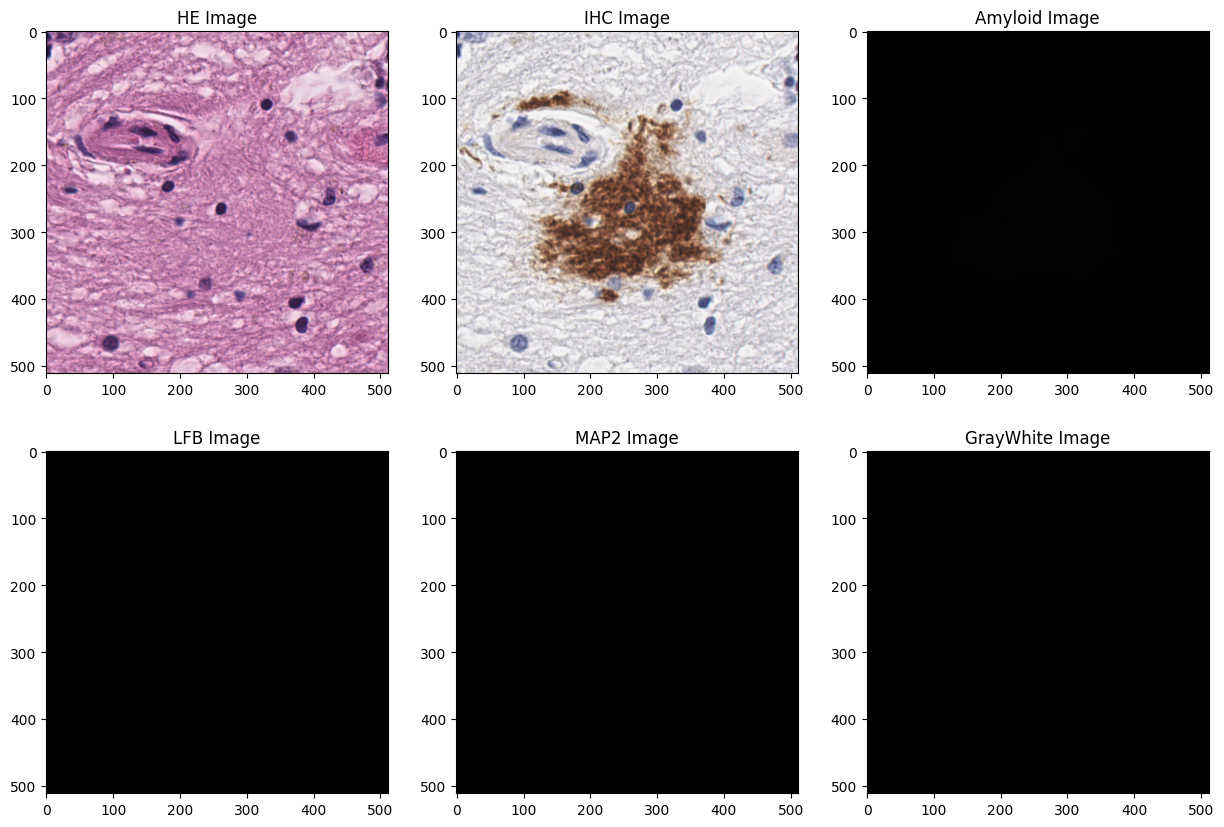

In [21]:
# len(df[df['split'] == 'train'])
# read and show images of data.loc[0] 
# he_filepath
# ihc_filepath          
# amyloid_filepath      
# lfb_filepath       
# map2_filepath 
# graywhite_filepath

data_path = '/data1/shared/data/destain_restain/he_amyloid/positive_crops/flow_matching/train/'
he_image_path = os.path.join(data_path, df.loc[0]['he_filepath'])
ihc_image_path = os.path.join(data_path, df.loc[0]['ihc_filepath'])
amyloid_image_path = os.path.join(data_path, df.loc[0]['amyloid_filepath'])
lfb_image_path = os.path.join(data_path, df.loc[0]['lfb_filepath'])
map2_image_path = os.path.join(data_path, df.loc[0]['map2_filepath'])
graywhite_image_path = os.path.join(data_path, df.loc[0]['graywhite_filepath'])
from PIL import Image
import cv2
import matplotlib.pyplot as plt
he_image = cv2.imread(he_image_path)
he_image = cv2.cvtColor(he_image, cv2.COLOR_BGR2RGB)
ihc_image = cv2.imread(ihc_image_path)
ihc_image = cv2.cvtColor(ihc_image, cv2.COLOR_BGR2RGB)
amyloid_image = cv2.imread(amyloid_image_path)
amyloid_image = cv2.cvtColor(amyloid_image, cv2.COLOR_BGR2RGB)
lfb_image = cv2.imread(lfb_image_path)
lfb_image = cv2.cvtColor(lfb_image, cv2.COLOR_BGR2RGB)
map2_image = cv2.imread(map2_image_path)
map2_image = cv2.cvtColor(map2_image, cv2.COLOR_BGR2RGB)
graywhite_image = cv2.imread(graywhite_image_path)
graywhite_image = cv2.cvtColor(graywhite_image, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(he_image)
axs[0, 0].set_title('HE Image')
axs[0, 1].imshow(ihc_image)
axs[0, 1].set_title('IHC Image')
axs[0, 2].imshow(amyloid_image)
axs[0, 2].set_title('Amyloid Image')
axs[1, 0].imshow(lfb_image)
axs[1, 0].set_title('LFB Image')
axs[1, 1].imshow(map2_image)
axs[1, 1].set_title('MAP2 Image')
axs[1, 2].imshow(graywhite_image)
axs[1, 2].set_title('GrayWhite Image')
plt.show()

In [13]:
# df.loc[0]['he_filepath'] in os.listdir(os.path.join(data_path, 'train'))
df.loc[0]['ihc_filepath'] in os.listdir(os.path.join(data_path, 'train'))

True

In [16]:
print(df.loc[0]['image_id'], df.loc[0]['he_filepath'], df.loc[0]['ihc_filepath'])

00000_135040e981d9c0ed_part-A3-4_amyloid_x100080_y47200 00000_135040e981d9c0ed_part-A3-4_amyloid_x100080_y47200_he.png 00000_135040e981d9c0ed_part-A3-4_amyloid_x100080_y47200_ihc.png


In [14]:
df.loc[0]['ihc_filepath']

'00000_135040e981d9c0ed_part-A3-4_amyloid_x100080_y47200_ihc.png'

In [7]:
len(os.listdir(os.path.join(data_path, 'train')))

15792

In [8]:
len(os.listdir(os.path.join(data_path, 'val')))

1652

In [9]:
len(os.listdir(os.path.join(data_path, 'test')))

5348